In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from imblearn.combine import SMOTEENN
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.feature_selection import SelectKBest, f_classif
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df= pd.read_csv(r'data.csv')

In [ ]:
#To describe the merged dataframe df
df.describe()

,maternalage,ageatfirstmarriage,ageatfirstpregnancy,numberofancvisit,gravidity,parity,birthweight,apgarscoreatfiveminutes,hemoglobinlevelonadmissionfordel,numberofpuscellsinurineonadmissi,Residence_COunty,Ethnicity12,AgeFstPregnancy
count,352.000000,292.000000,352.000000,352.000000,352.000000,352.000000,342.000000,345.000000,337.000000,66.000000,352.0,352.000000,352.000000
mean,26.465909,21.777397,21.559659,3.849432,2.053977,1.840909,3036.871345,8.307246,11.905341,10.212121,1.0,2.690341,1.681818
std,5.493221,3.613896,3.551312,1.501205,1.122135,1.028221,597.889255,2.422899,1.473587,6.889267,0.0,1.459078,0.472502
min,17.000000,14.000000,14.000000,0.000000,1.000000,0.000000,960.000000,0.000000,6.400000,2.000000,1.0,1.000000,1.000000
25%,22.000000,19.000000,19.000000,3.000000,1.000000,1.000000,2800.000000,9.000000,11.000000,4.250000,1.0,1.000000,1.000000
50%,25.000000,21.000000,21.000000,4.000000,2.000000,2.000000,3100.000000,9.000000,12.000000,9.000000,1.0,2.500000,2.000000
75%,30.000000,24.000000,24.000000,5.000000,3.000000,2.000000,3400.000000,9.000000,12.800000,12.000000,1.0,4.000000,2.000000
max,42.000000,35.000000,38.000000,12.000000,6.000000,6.000000,4500.000000,10.000000,15.800000,30.000000,1.0,5.000000,3.000000


In [ ]:
df.dtypes

id                   object
maternalage           int64
maternaleducation    object
maritalstatus        object
occupation           object
                      ...  
TimeAlcoholuse       object
SpecificTreat1       object
TretaMentPurpose1    object
Ethnicity12           int64
AgeFstPregnancy       int64
Length: 88, dtype: object

In [ ]:
df.isna().sum()

id                     0
maternalage            0
maternaleducation      0
maritalstatus          0
occupation             0
                    ... 
TimeAlcoholuse       327
SpecificTreat1       332
TretaMentPurpose1    332
Ethnicity12            0
AgeFstPregnancy        0
Length: 88, dtype: int64

In [ ]:
df2 = df[['maternalage','maternaleducation', 'ageatfirstpregnancy','parity','diabetespersonalhistory','diabetesfamilyhistory','hypertensionpersonalhistory','hypertensionfamilyhistory','numberofancvisit','timetrimesteroffirstancvisit','multiplicityofpregnancy','gravidity','tobaccouse','alcoholuse','AgeFstPregnancy','countyofresidence','Specific_AreaResid','Disease']]

In [ ]:
df2.dtypes

maternalage                      int64
maternaleducation               object
ageatfirstpregnancy              int64
parity                           int64
diabetespersonalhistory         object
diabetesfamilyhistory           object
hypertensionpersonalhistory     object
hypertensionfamilyhistory       object
numberofancvisit                 int64
timetrimesteroffirstancvisit    object
multiplicityofpregnancy         object
gravidity                        int64
tobaccouse                      object
alcoholuse                      object
AgeFstPregnancy                  int64
countyofresidence               object
Specific_AreaResid              object
Disease                         object
dtype: object

In [ ]:
# Replace all occurrences of 'Case (Preeclampsia and/Eclampsia)' with 1 in the 'disease' column
df2['Disease'] = df2['Disease'].replace('Case (Preeclampsia and/Eclampsia)', 1)

# Replace all occurrences of 'Control ( Without Preeclampsia and/Eclampsia)' with 0 in the 'disease' column
df2['Disease'] = df2['Disease'].replace('Control ( Without Preeclampsia and/Eclampsia)', 0)

<ipython-input-8-016cc50ba029>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Disease'] = df2['Disease'].replace('Case (Preeclampsia and/Eclampsia)', 1)
<ipython-input-8-016cc50ba029>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Disease'] = df2['Disease'].replace('Control ( Without Preeclampsia and/Eclampsia)', 0)


In [ ]:
df2

,maternalage,maternaleducation,ageatfirstpregnancy,parity,diabetespersonalhistory,diabetesfamilyhistory,hypertensionpersonalhistory,hypertensionfamilyhistory,numberofancvisit,timetrimesteroffirstancvisit,multiplicityofpregnancy,gravidity,tobaccouse,alcoholuse,AgeFstPregnancy,countyofresidence,Specific_AreaResid,Disease
0,24,Tertiary education,24,1,No,No,No,No,4,First trimester,Singleton,1,No,No,2,Nairobi,Informal settlement,1
1,37,Tertiary education,26,4,No,No,No,Yes,3,First trimester,Singleton,4,No,No,2,Nairobi,Informal settlement,1
2,27,Tertiary education,26,1,No,No,No,No,3,Second trimester,Singleton,1,Yes,Yes,2,Nairobi,Urban/estate,1
3,30,Tertiary education,27,2,No,Yes,No,No,3,First trimester,Singleton,2,No,No,2,Nairobi,Informal settlement,0
4,29,Secondary education,18,3,No,No,No,Yes,4,First trimester,Singleton,3,No,No,1,Nairobi,Informal settlement,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,32,Tertiary education,29,2,No,No,No,No,3,Second trimester,Singleton,2,No,No,2,Nairobi,Informal settlement,1
348,27,Secondary education,25,2,No,Yes,No,Yes,3,Second trimester,Singleton,2,No,No,2,Nairobi,Informal settlement,0
349,27,Primary education,18,2,No,No,No,No,5,Second trimester,Singleton,2,No,No,1,Nairobi,Informal settlement,0
350,26,Secondary education,23,2,No,No,No,No,4,Second trimester,Singleton,2,No,No,2,Kajiado,Informal settlement,0


In [ ]:
df2['diabetespersonalhistory'] = df2['diabetespersonalhistory'].replace('Yes',1)
df2['diabetespersonalhistory'] = df2['diabetespersonalhistory'].replace('No',0)
df2['diabetesfamilyhistory'] = df2['diabetesfamilyhistory'].replace('Yes',1)
df2['diabetesfamilyhistory'] = df2['diabetesfamilyhistory'].replace('No',0)
df2['hypertensionpersonalhistory'] = df2['hypertensionpersonalhistory'].replace('Yes',1)
df2['hypertensionpersonalhistory'] = df2['hypertensionpersonalhistory'].replace('No',0)
df2['hypertensionfamilyhistory'] = df2['hypertensionfamilyhistory'].replace('Yes',1)
df2['hypertensionfamilyhistory'] = df2['hypertensionfamilyhistory'].replace('No',0)
df2['timetrimesteroffirstancvisit']= df2['timetrimesteroffirstancvisit'].replace('First trimester',1)
df2['timetrimesteroffirstancvisit']= df2['timetrimesteroffirstancvisit'].replace('Second trimester ',2)
df2['timetrimesteroffirstancvisit']= df2['timetrimesteroffirstancvisit'].replace('Third trimester',3)
df2['timetrimesteroffirstancvisit']= df2['timetrimesteroffirstancvisit'].replace('None',0)
df2['multiplicityofpregnancy']= df2['multiplicityofpregnancy'].replace('Singleton',1)
df2['multiplicityofpregnancy']= df2['multiplicityofpregnancy'].replace('Twin',2)
df2['tobaccouse'] = df2['tobaccouse'].replace('Yes',1)
df2['tobaccouse'] = df2['tobaccouse'].replace('No',0)
df2['alcoholuse'] = df2['alcoholuse'].replace('Yes',1)
df2['alcoholuse'] = df2['alcoholuse'].replace('No',0)
df2['Specific_AreaResid'] = df2['Specific_AreaResid'].replace('Rural',0)
df2['Specific_AreaResid'] = df2['Specific_AreaResid'].replace('Informal settlement',1)
df2['Specific_AreaResid'] = df2['Specific_AreaResid'].replace('Urban/estate',2)

<ipython-input-10-e3dae645371d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['diabetespersonalhistory'] = df2['diabetespersonalhistory'].replace('Yes',1)
<ipython-input-10-e3dae645371d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['diabetespersonalhistory'] = df2['diabetespersonalhistory'].replace('No',0)
<ipython-input-10-e3dae645371d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

In [ ]:
df2

,maternalage,maternaleducation,ageatfirstpregnancy,parity,diabetespersonalhistory,diabetesfamilyhistory,hypertensionpersonalhistory,hypertensionfamilyhistory,numberofancvisit,timetrimesteroffirstancvisit,multiplicityofpregnancy,gravidity,tobaccouse,alcoholuse,AgeFstPregnancy,countyofresidence,Specific_AreaResid,Disease
0,24,Tertiary education,24,1,0,0,0,0,4,1,1,1,0,0,2,Nairobi,1,1
1,37,Tertiary education,26,4,0,0,0,1,3,1,1,4,0,0,2,Nairobi,1,1
2,27,Tertiary education,26,1,0,0,0,0,3,2,1,1,1,1,2,Nairobi,2,1
3,30,Tertiary education,27,2,0,1,0,0,3,1,1,2,0,0,2,Nairobi,1,0
4,29,Secondary education,18,3,0,0,0,1,4,1,1,3,0,0,1,Nairobi,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,32,Tertiary education,29,2,0,0,0,0,3,2,1,2,0,0,2,Nairobi,1,1
348,27,Secondary education,25,2,0,1,0,1,3,2,1,2,0,0,2,Nairobi,1,0
349,27,Primary education,18,2,0,0,0,0,5,2,1,2,0,0,1,Nairobi,1,0
350,26,Secondary education,23,2,0,0,0,0,4,2,1,2,0,0,2,Kajiado,1,0


In [ ]:
df2 = df2.drop('countyofresidence',axis=1)
df2 = df2.drop('maternaleducation',axis=1)
df2 = df2.drop('diabetespersonalhistory',axis=1)

In [ ]:
df2

,maternalage,ageatfirstpregnancy,parity,diabetesfamilyhistory,hypertensionpersonalhistory,hypertensionfamilyhistory,numberofancvisit,timetrimesteroffirstancvisit,multiplicityofpregnancy,gravidity,tobaccouse,alcoholuse,AgeFstPregnancy,Specific_AreaResid,Disease
0,24,24,1,0,0,0,4,1,1,1,0,0,2,1,1
1,37,26,4,0,0,1,3,1,1,4,0,0,2,1,1
2,27,26,1,0,0,0,3,2,1,1,1,1,2,2,1
3,30,27,2,1,0,0,3,1,1,2,0,0,2,1,0
4,29,18,3,0,0,1,4,1,1,3,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,32,29,2,0,0,0,3,2,1,2,0,0,2,1,1
348,27,25,2,1,0,1,3,2,1,2,0,0,2,1,0
349,27,18,2,0,0,0,5,2,1,2,0,0,1,1,0
350,26,23,2,0,0,0,4,2,1,2,0,0,2,1,0


In [ ]:
df2.isna().sum()

maternalage                     0
ageatfirstpregnancy             0
parity                          0
diabetesfamilyhistory           0
hypertensionpersonalhistory     0
hypertensionfamilyhistory       0
numberofancvisit                0
timetrimesteroffirstancvisit    0
multiplicityofpregnancy         0
gravidity                       0
tobaccouse                      0
alcoholuse                      0
AgeFstPregnancy                 0
Specific_AreaResid              0
Disease                         0
dtype: int64

In [ ]:
#check for duplicate values
df2.duplicated().sum()

13

In [ ]:
#Remove duplicates
df2.drop_duplicates(inplace=True)
df2.shape

(339, 15)

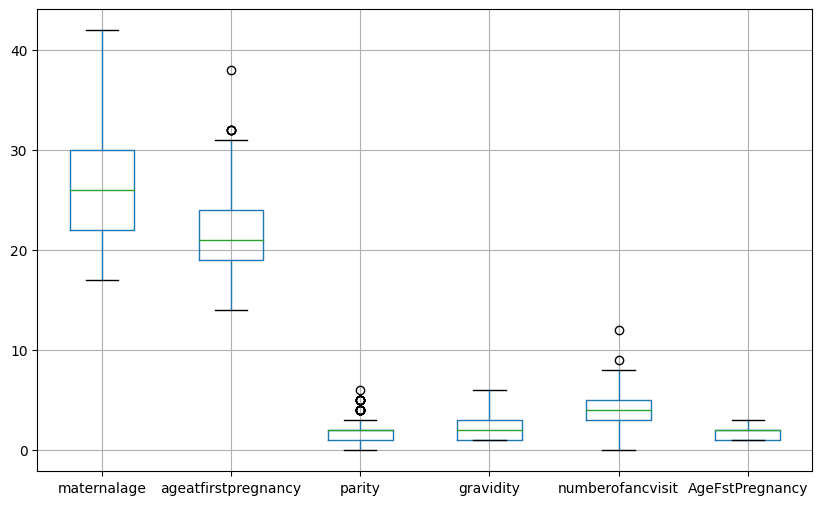

In [ ]:
# Select columns to be plotted 
columns = ['maternalage', 'ageatfirstpregnancy', 'parity','gravidity','numberofancvisit','AgeFstPregnancy'] 
# Create the boxplot 
df2.boxplot(column=columns, figsize=(10, 6)) 
# Display the plot 
plt.show()

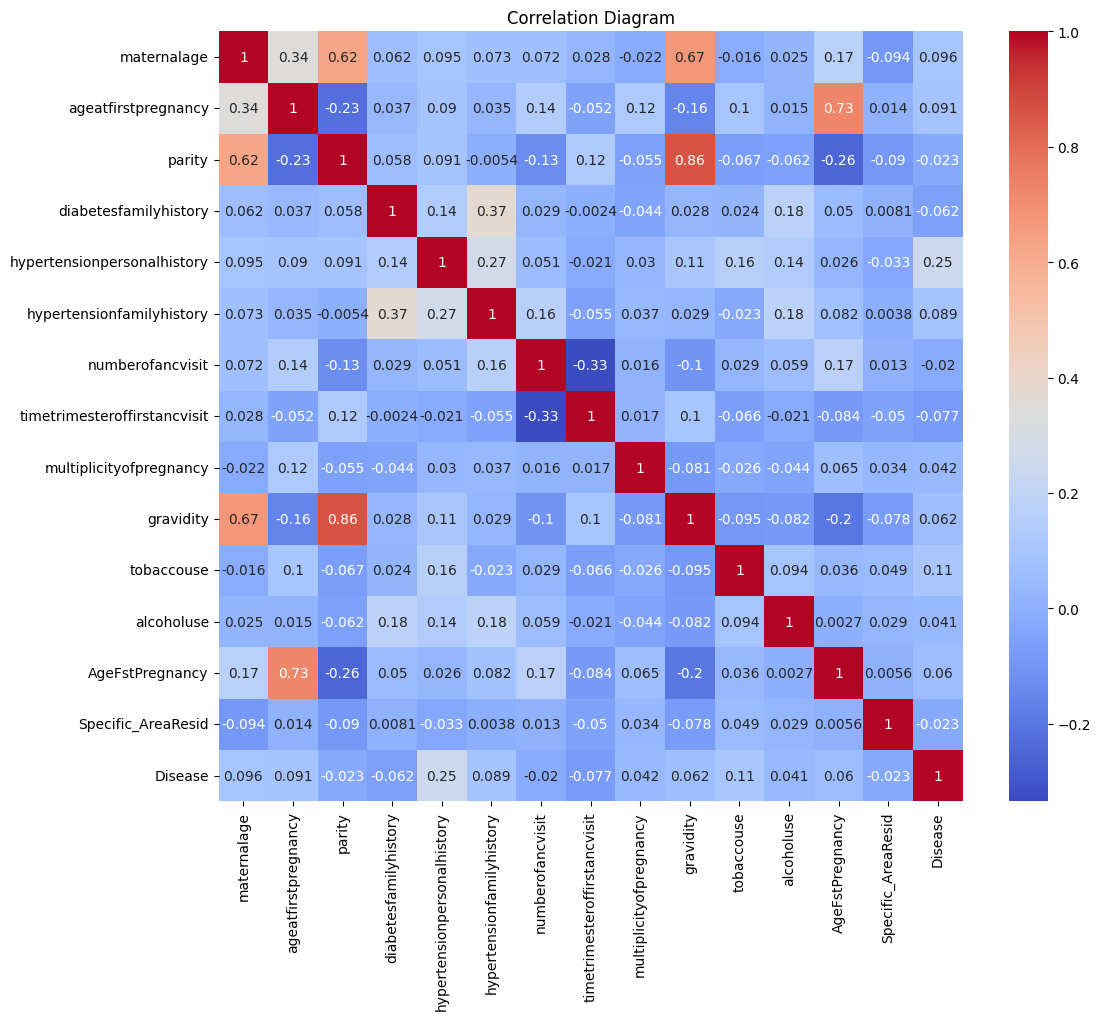

In [ ]:
corr_matrix = df2.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Diagram')
plt.show()

In [ ]:
df2.to_csv(r'C:\Users\folop\OneDrive\Desktop\data.csv', index=False)

In [ ]:
scaler=StandardScaler()
x=scaler.fit_transform(df2)

In [ ]:
df2

,maternalage,ageatfirstpregnancy,parity,diabetesfamilyhistory,hypertensionpersonalhistory,hypertensionfamilyhistory,numberofancvisit,timetrimesteroffirstancvisit,multiplicityofpregnancy,gravidity,tobaccouse,alcoholuse,AgeFstPregnancy,Specific_AreaResid,Disease
0,24,24,1,0,0,0,4,1,1,1,0,0,2,1,1
1,37,26,4,0,0,1,3,1,1,4,0,0,2,1,1
2,27,26,1,0,0,0,3,2,1,1,1,1,2,2,1
3,30,27,2,1,0,0,3,1,1,2,0,0,2,1,0
4,29,18,3,0,0,1,4,1,1,3,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,32,29,2,0,0,0,3,2,1,2,0,0,2,1,1
348,27,25,2,1,0,1,3,2,1,2,0,0,2,1,0
349,27,18,2,0,0,0,5,2,1,2,0,0,1,1,0
350,26,23,2,0,0,0,4,2,1,2,0,0,2,1,0


In [ ]:
# Separate the target variable from the features
X = df2.drop('Disease', axis=1)
y = df2['Disease']

In [ ]:
# Create a Random Forest classifier
rfc = RandomForestClassifier()

In [ ]:
# Train the classifier on the features and target variable
rfc.fit(X, y)

RandomForestClassifier()

In [ ]:
# Get the feature importances
importances = rfc.feature_importances_

# Create a DataFrame of feature importances
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': importances})

# Sort the DataFrame by feature importance
feature_importances = feature_importances.sort_values('importance', ascending=False)

# Print the top 14 most important features
print(feature_importances.head(14))

                         feature  importance
0                    maternalage    0.197872
1            ageatfirstpregnancy    0.180208
6               numberofancvisit    0.156376
2                         parity    0.082616
9                      gravidity    0.076009
7   timetrimesteroffirstancvisit    0.071448
13            Specific_AreaResid    0.056339
4    hypertensionpersonalhistory    0.056305
5      hypertensionfamilyhistory    0.031994
12               AgeFstPregnancy    0.023757
11                    alcoholuse    0.019046
8        multiplicityofpregnancy    0.018551
10                    tobaccouse    0.015512
3          diabetesfamilyhistory    0.013968


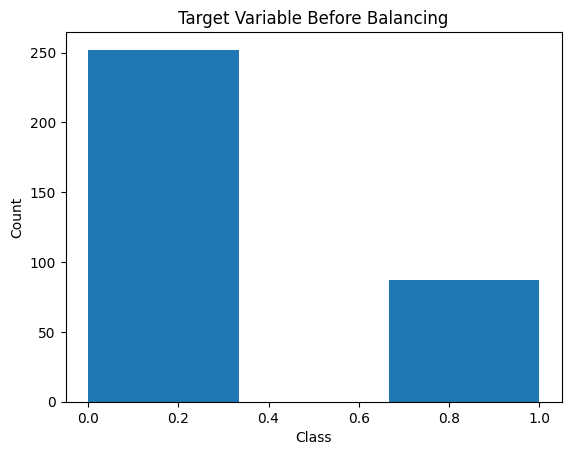

In [ ]:
# plot the target variable before balancing
plt.hist(y, bins=3)
plt.title('Target Variable Before Balancing')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

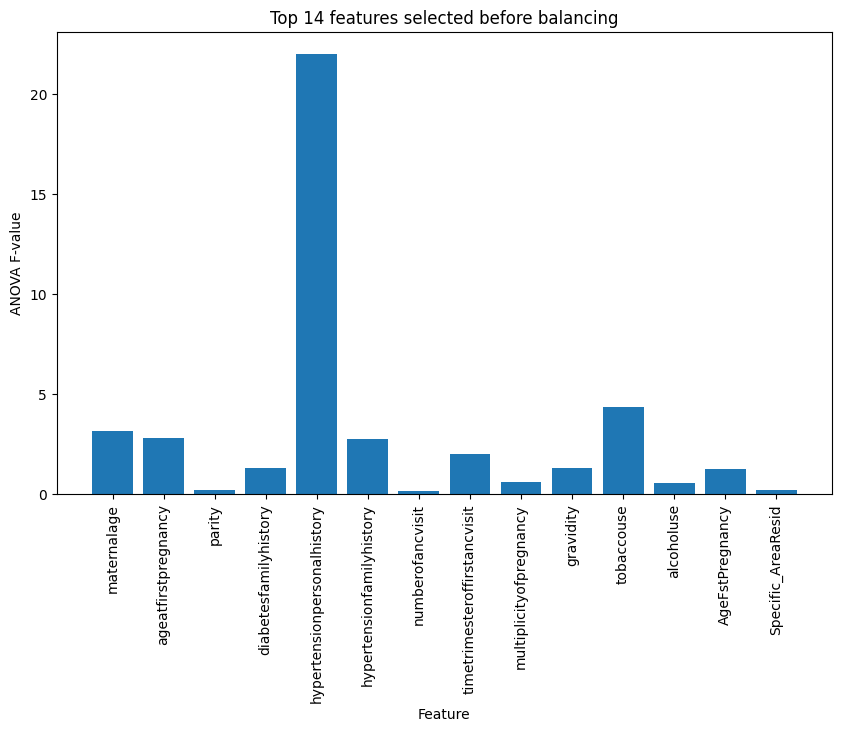

In [ ]:
k = 14
selector = SelectKBest(f_classif, k=k)
selector.fit(X, y)
X_topk = selector.transform(X)

# Plot selected features before balancing
plt.figure(figsize=(10,6))
plt.bar(range(len(selector.scores_)), selector.scores_)
plt.xticks(range(len(selector.scores_)), X.columns, rotation=90)
plt.xlabel('Feature')
plt.ylabel('ANOVA F-value')
plt.title('Top {} features selected before balancing'.format(k))
plt.show()

In [ ]:
# Create the dataset
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

# Define the model architecture
model = Sequential()
model.add(Dense(4, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X, y, epochs=1000, batch_size=4)

# Test the model
predictions = model.predict(X)
print(predictions)

Epoch 1/1000
1/1 [==============================] - 3s 3s/step - loss: 0.6810 - accuracy: 0.7500
Epoch 2/1000
1/1 [==============================] - 0s 31ms/step - loss: 0.6806 - accuracy: 0.5000
Epoch 3/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.6801 - accuracy: 0.5000
Epoch 4/1000
1/1 [==============================] - 0s 41ms/step - loss: 0.6797 - accuracy: 0.5000
Epoch 5/1000
1/1 [==============================] - 0s 25ms/step - loss: 0.6792 - accuracy: 0.5000
Epoch 6/1000
1/1 [==============================] - 0s 25ms/step - loss: 0.6788 - accuracy: 0.5000
Epoch 7/1000
1/1 [==============================] - 0s 19ms/step - loss: 0.6783 - accuracy: 0.5000
Epoch 8/1000
1/1 [==============================] - 0s 28ms/step - loss: 0.6779 - accuracy: 0.5000
Epoch 9/1000
1/1 [==============================] - 0s 26ms/step - loss: 0.6774 - accuracy: 0.5000
Epoch 10/1000
1/1 [==============================] - 0s 28ms/step - loss: 0.6770 - accuracy: 0.5000
Epoch 11/10

In [ ]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")   
print(classification_report(y_test, y_pred))

NameError: ignored

In [ ]:
cm=confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index=['0','1'], 
                     columns = ['control','Case'])
print(df_cm)

   control  Case
0       71     8
1       19     4


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84        79
           1       0.33      0.17      0.23        23

    accuracy                           0.74       102
   macro avg       0.56      0.54      0.53       102
weighted avg       0.69      0.74      0.70       102



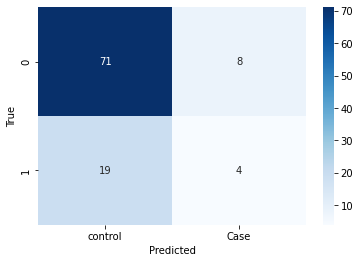

In [ ]:
sns.heatmap(df_cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

AUC-ROC score: 0.496147495872317


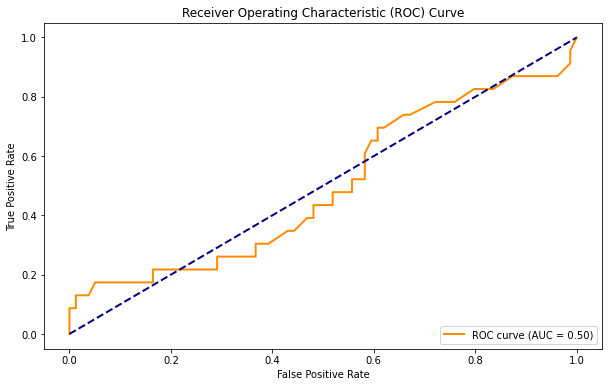

In [ ]:
# Predict probabilities for the testing set
y_prob = rf.predict_proba(X_test)[:,1]

# Calculate ROC curve and AUC-ROC score
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_roc = auc(fpr, tpr)
print("AUC-ROC score:", auc_roc)
# Plot ROC curve
plt.figure(figsize=(10,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % auc_roc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) # 75% training and 25% test
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Predict the target values using the testing data
y_pred = rf.predict(X_test)

# Evaluate the accuracy of the model using the testing data
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the model: {accuracy}")

Accuracy of the model: 0.7176470588235294


In [ ]:
cm=confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index=['0','1'], 
                     columns = ['control','Case'])
print(df_cm)

   control  Case
0       58     7
1       17     3


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.89      0.83        65
           1       0.30      0.15      0.20        20

    accuracy                           0.72        85
   macro avg       0.54      0.52      0.51        85
weighted avg       0.66      0.72      0.68        85



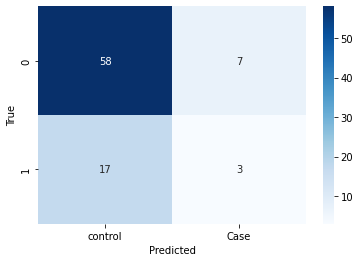

In [ ]:
sns.heatmap(df_cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

AUC-ROC score: 0.4992307692307692


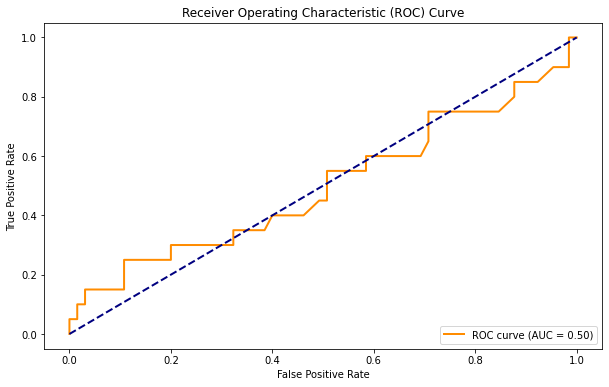

In [ ]:
# Predict probabilities for the testing set
y_prob = rf.predict_proba(X_test)[:,1]

# Calculate ROC curve and AUC-ROC score
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_roc = auc(fpr, tpr)
print("AUC-ROC score:", auc_roc)
# Plot ROC curve
plt.figure(figsize=(10,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % auc_roc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)# 80% training and 20% test
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Predict the target values using the testing data
y_pred = rf.predict(X_test)

# Evaluate the accuracy of the model using the testing data
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the model: {accuracy}")

Accuracy of the model: 0.7205882352941176


In [ ]:
cm=confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index=['0','1'], 
                     columns = ['control','Case'])
print(df_cm)

   control  Case
0       46     6
1       13     3


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.88      0.83        52
           1       0.33      0.19      0.24        16

    accuracy                           0.72        68
   macro avg       0.56      0.54      0.53        68
weighted avg       0.67      0.72      0.69        68



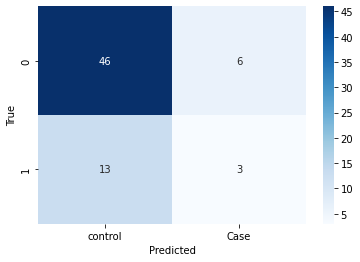

In [ ]:
sns.heatmap(df_cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

AUC-ROC score: 0.5823317307692307


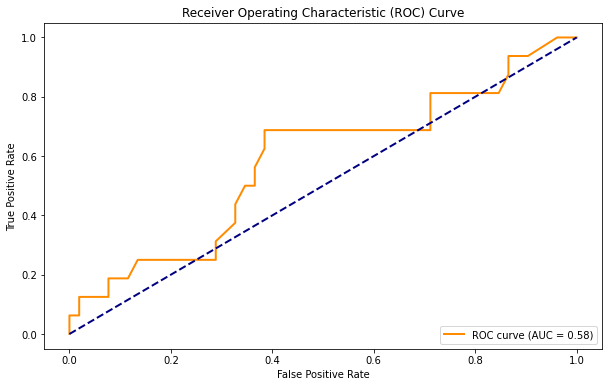

In [ ]:
# Predict probabilities for the testing set
y_prob = rf.predict_proba(X_test)[:,1]

# Calculate ROC curve and AUC-ROC score
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_roc = auc(fpr, tpr)
print("AUC-ROC score:", auc_roc)
# Plot ROC curve
plt.figure(figsize=(10,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % auc_roc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from imblearn.combine import SMOTEENN
from collections import Counter
counter = Counter(y_train)
print('Before',counter)
# assuming X_train and y_train are your input features and labels, respectively
smote_enn = SMOTEENN(random_state=0)
X_resampled, y_resampled = smote_enn.fit_resample(X_train, y_train)
counter = Counter(y_resampled)
print('After',counter)

Before Counter({0: 200, 1: 71})
After Counter({1: 104, 0: 64})


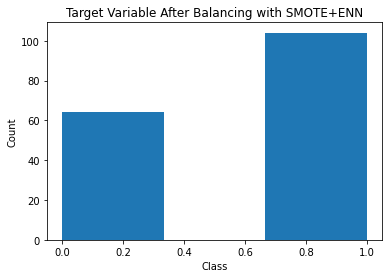

In [ ]:
plt.hist(y_resampled, bins=3)
plt.title('Target Variable After Balancing with SMOTE+ENN')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [8] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.9/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


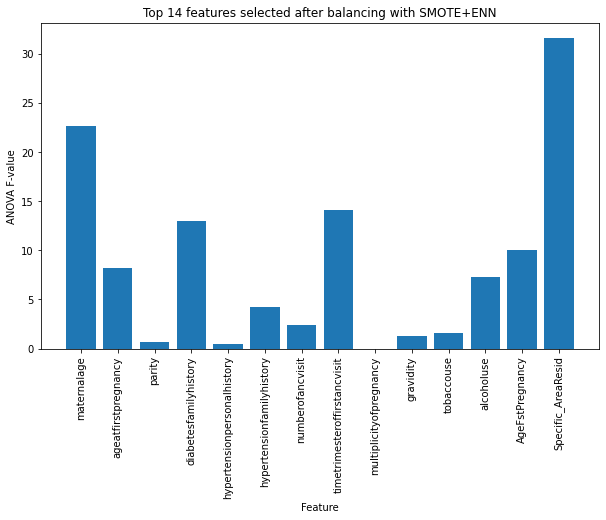

In [ ]:
selector_balanced = SelectKBest(f_classif, k=k)
selector_balanced.fit(X_resampled, y_resampled)
X_balanced_topk = selector_balanced.transform(X_resampled)

# Plot selected features after balancing
plt.figure(figsize=(10,6))
plt.bar(range(len(selector_balanced.scores_)), selector_balanced.scores_)
plt.xticks(range(len(selector_balanced.scores_)), X.columns[selector.get_support()], rotation=90)
plt.xlabel('Feature')
plt.ylabel('ANOVA F-value')
plt.title('Top {} features selected after balancing with SMOTE+ENN'.format(k))
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.30, random_state=42)
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Predict the target values using the testing data
y_pred = rf.predict(X_test)

# Evaluate the accuracy of the model using the testing data
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the model: {accuracy}")

Accuracy of the model: 0.8431372549019608


In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index=['0','1'], 
                     columns = ['control','Case'])
print(df_cm)

   control  Case
0       13     7
1        1    30


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.65      0.76        20
           1       0.81      0.97      0.88        31

    accuracy                           0.84        51
   macro avg       0.87      0.81      0.82        51
weighted avg       0.86      0.84      0.84        51



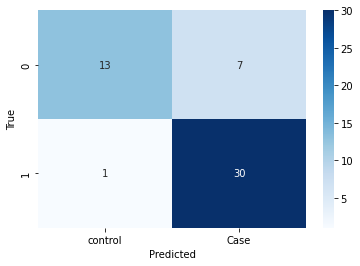

In [ ]:
sns.heatmap(df_cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

AUC-ROC score: 0.957258064516129


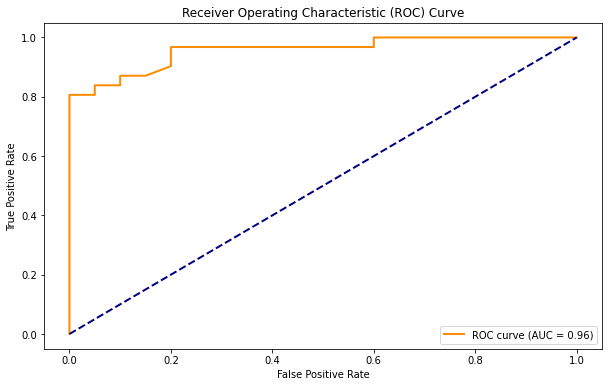

In [ ]:
# Predict probabilities for the testing set
y_prob = rf.predict_proba(X_test)[:,1]

# Calculate ROC curve and AUC-ROC score
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_roc = auc(fpr, tpr)
print("AUC-ROC score:", auc_roc)
# Plot ROC curve
plt.figure(figsize=(10,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % auc_roc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.25, random_state=42)
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Predict the target values using the testing data
y_pred = rf.predict(X_test)

# Evaluate the accuracy of the model using the testing data
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the model: {accuracy}")

Accuracy of the model: 0.8571428571428571


In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index=['0','1'], 
                     columns = ['control','Case'])
print(df_cm)

   control  Case
0       13     4
1        2    23


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.76      0.81        17
           1       0.85      0.92      0.88        25

    accuracy                           0.86        42
   macro avg       0.86      0.84      0.85        42
weighted avg       0.86      0.86      0.86        42



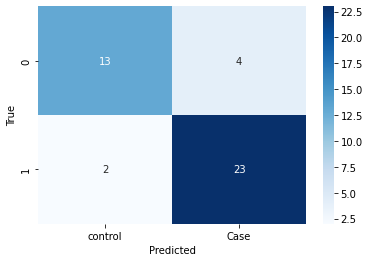

In [ ]:
sns.heatmap(df_cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

AUC-ROC score: 0.9552941176470588


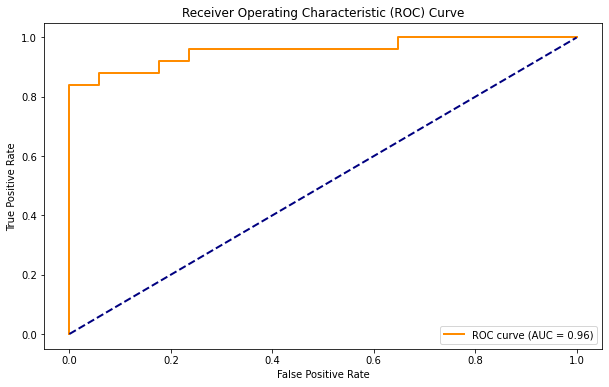

In [ ]:
# Predict probabilities for the testing set
y_prob = rf.predict_proba(X_test)[:,1]

# Calculate ROC curve and AUC-ROC score
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_roc = auc(fpr, tpr)
print("AUC-ROC score:", auc_roc)
# Plot ROC curve
plt.figure(figsize=(10,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % auc_roc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.20, random_state=42)
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Predict the target values using the testing data
y_pred = rf.predict(X_test)

# Evaluate the accuracy of the model using the testing data
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the model: {accuracy}")

Accuracy of the model: 0.8529411764705882


In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index=['0','1'], 
                     columns = ['control','Case'])
print(df_cm)

   control  Case
0       12     4
1        1    17


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.75      0.83        16
           1       0.81      0.94      0.87        18

    accuracy                           0.85        34
   macro avg       0.87      0.85      0.85        34
weighted avg       0.86      0.85      0.85        34



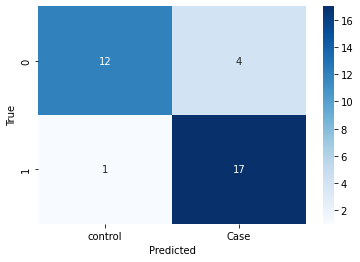

In [ ]:
sns.heatmap(df_cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

AUC-ROC score: 0.951388888888889


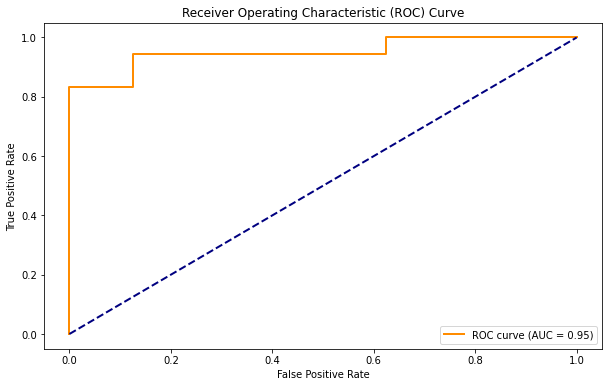

In [ ]:
# Predict probabilities for the testing set
y_prob = rf.predict_proba(X_test)[:,1]

# Calculate ROC curve and AUC-ROC score
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_roc = auc(fpr, tpr)
print("AUC-ROC score:", auc_roc)
# Plot ROC curve
plt.figure(figsize=(10,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % auc_roc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

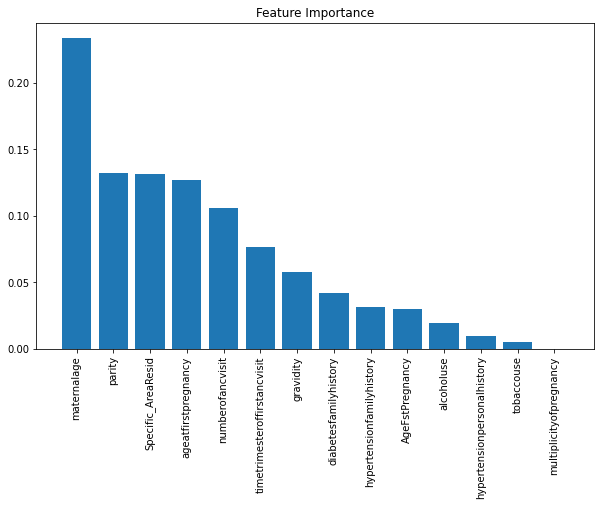

In [ ]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

# Plot feature importance
plt.figure(figsize=(10,6))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.show()

In [ ]:
from sklearn.decomposition import PCA
# Apply PCA
pca = PCA(n_components=0.9)
X_pca = pca.fit_transform(X_scaled)

# Select principal components
selected_features = pca.components_

# Reconstruct the data
X_reconstructed = pca.inverse_transform(X_pca)

NameError: ignored